Скрипт формирует  файл <<sound.wav>> с тональным сигналом заданной частоты (нота <<Ля>>),
формирует файл <<noise.wav>>, добавляя в него нормальный белый шум, затем фильтрует сигнал 
методом когерентного накопления и записывает результат в файл <<filter.wav>>

Подключение необходимых библиотек

In [1]:
import scipy as sp;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.io.wavfile as wf

Параметры 

In [2]:
volume=.5;
f0=440; # Частота сигнала, Гц
fd=16000; # Частота дискретизации, Гц
mean = 0 # Математическое ожидание шума
std = 1 # 
nK=100; # Количество накоплений
nT=20; # Количество периодов отфильтрованного сигнала
dt0=nT/f0 # Длительность отфильтрованного сигнала, с
N0=nT*int(fd/f0) # Количество отсчетов отфильтрованного сигнала
dt=nK*dt0; # Длительность зашумлённого сигнала, с
N=N0*nK # Общее количество отсчетов сигнала
gT=3 # Количество периодов для визуализации

Формирование тонального сигнала

In [3]:
t=np.linspace(0,dt,N);
# t - значения области определения во временной области
data=volume*np.cos(2*np.pi*f0*t)

График исходного сигнала
во временной и частотной областях

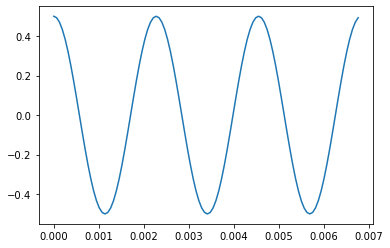

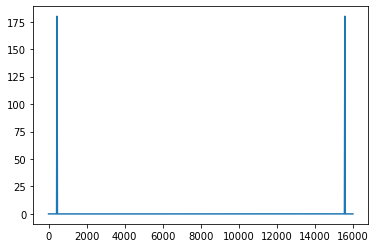

In [4]:
plt.plot(t[0:gT*int(fd/f0)],data[0:gT*int(fd/f0)]);
plt.show();
f=np.linspace(0,fd,N0);
# f - значения области определения в частотной области
fdata=np.abs(np.fft.fft(data[0:N0]));
# fdata - массив отсчётов спектра сигнала
plt.plot(f,fdata);
plt.show();


Запись звукового файла c отфильтрованным сигналом

In [5]:
wf.write('sound.wav',fd,data);

Формирование шума

In [6]:
ny = np.random.normal(mean, std, N)

Формирование зашумлённого сигнала

In [7]:
ndata=data+ny

Запись звукового файла c зашумлённым сигналом

In [8]:
wf.write('noise.wav',fd,data);

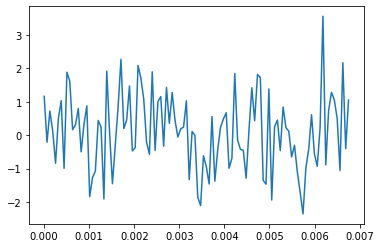

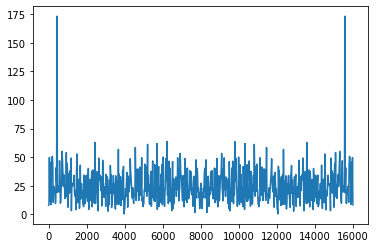

In [9]:
mdata=ndata.reshape((N0,nK),order='F');
plt.plot(t[0:gT*int(fd/f0)],mdata[0:gT*int(fd/f0),1]);
plt.show(); 
fmdata=np.abs(np.fft.fft(mdata[:,1]));
# fdata - массив отсчётов спектра сигнала
plt.plot(f,fmdata);
plt.show();

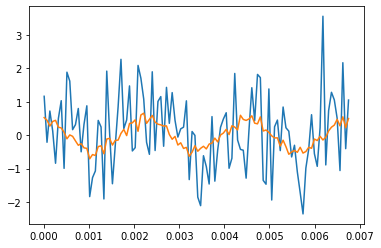

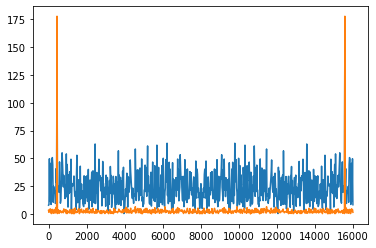

In [15]:
sdata=mdata.sum(1)/nK
plt.plot(t[0:gT*int(fd/f0)],mdata[0:gT*int(fd/f0),1]);
plt.plot(t[0:gT*int(fd/f0)],sdata[0:gT*int(fd/f0)]);
plt.show();  
fsdata=np.abs(np.fft.fft(sdata));
# fdata - массив отсчётов спектра сигнала
plt.plot(f,fmdata);
plt.plot(f,fsdata);
plt.show();

Запись звукового файла c отфильтрованным сигналом

In [11]:
wf.write('sound-ca.wav',fd,ndata);